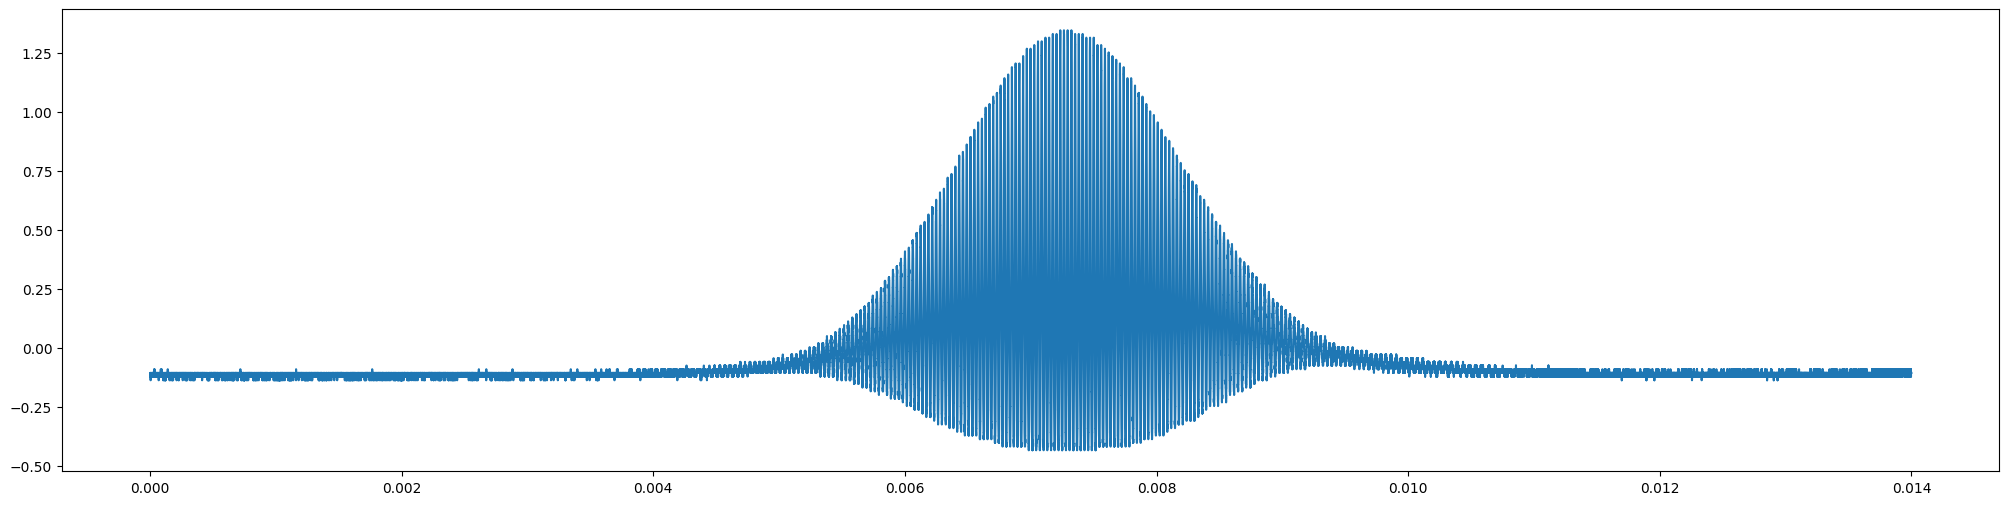

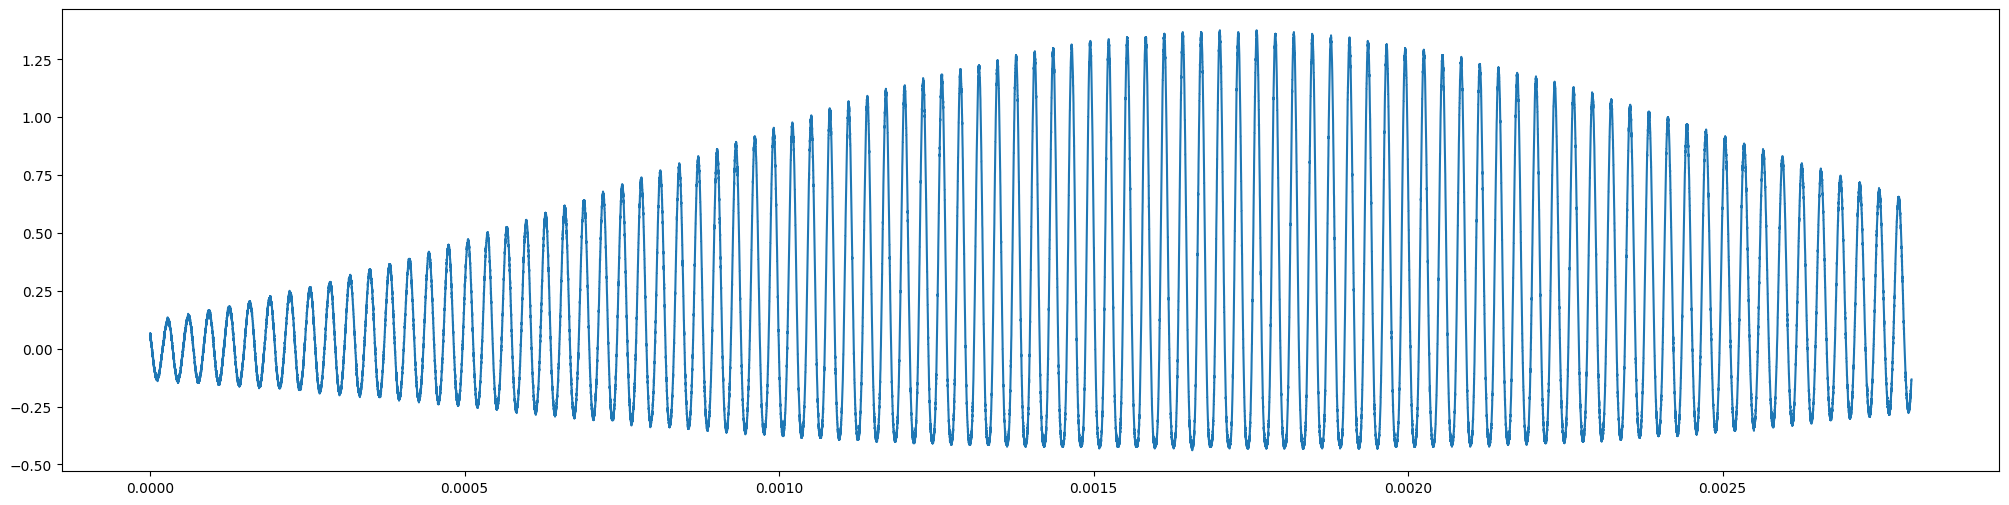

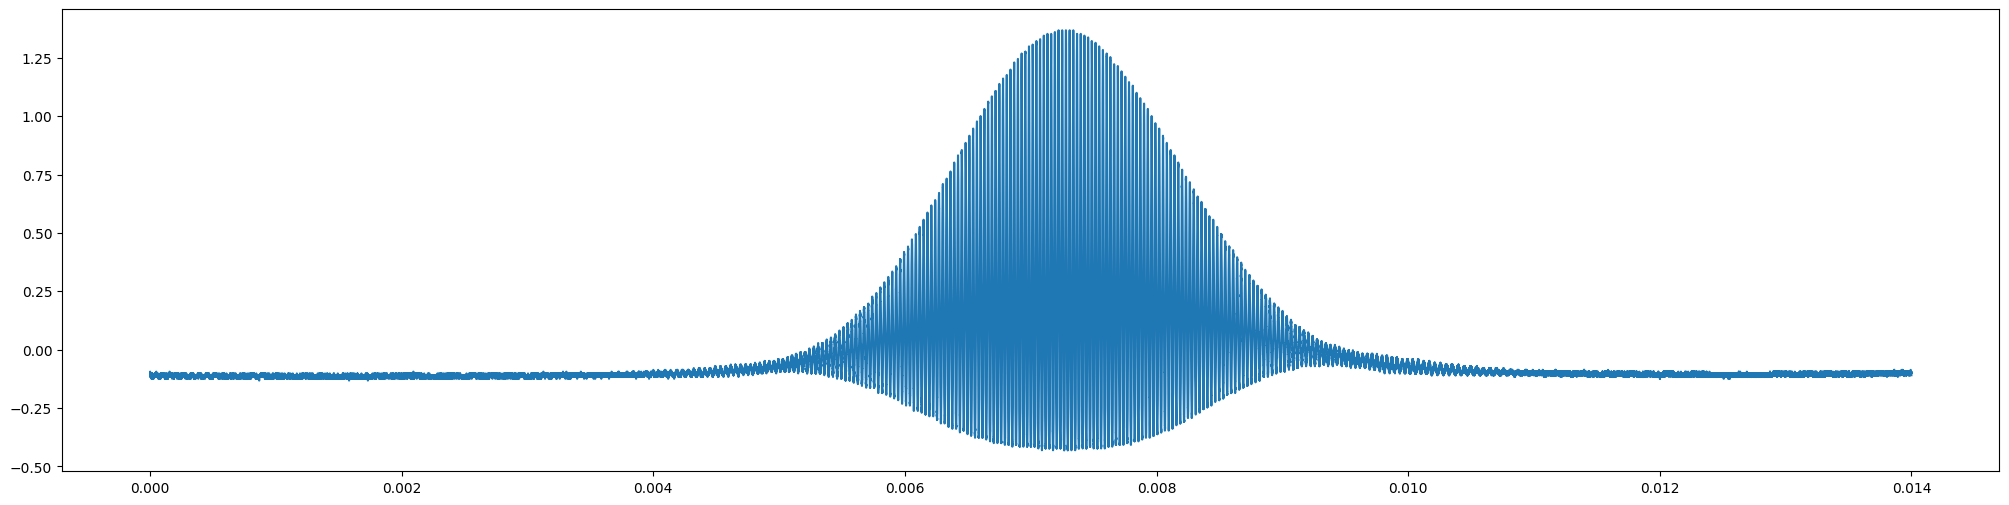

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate

# set the output path
output_path = '/Users/ssajal/Desktop/academic/practical_M.1/ultrafast_transient_grating/code/output/'

#load the data
unscalled_time_1,intensity_1 = np.loadtxt("/Users/ssajal/Desktop/academic/practical_M.1/ultrafast_transient_grating/updated_data/vor1", delimiter=',', unpack = True)
unscalled_time_2,intensity_2 = np.loadtxt("/Users/ssajal/Desktop/academic/practical_M.1/ultrafast_transient_grating/updated_data/vor2", delimiter=',', unpack = True)
unscalled_time_3,intensity_3 = np.loadtxt("/Users/ssajal/Desktop/academic/practical_M.1/ultrafast_transient_grating/updated_data/vor3", delimiter=',', unpack = True)

# plot the raw data
plt.figure(figsize = (25,6))
plt.plot(unscalled_time_1,intensity_1)
plt.figure(figsize = (25,6))
plt.plot(unscalled_time_2,intensity_2)
plt.figure(figsize = (25,6))
plt.plot(unscalled_time_3,intensity_3)


Now we are defining the main function to fit our raw data.

In [57]:
# main function with all the parameters are free to fit.
def initial_func(t,A,B,C,Ω,w,t_0, O):

    I_1 = 1 + A * np.exp((-2 * np.log(2) * ((t - t_0)**2)) / (w**2))
    I_2 = B * 4 * np.exp(-3 * np.log(2) * ((t - t_0)**2) / (2 * w ** 2)) * np.cos(Ω * t)
    I_3 = C * 2 * np.exp(-2 * np.log(2) * ((t - t_0) **2) / (w**2)) * (np.cos(Ω * t))**2
    return I_1+I_2+I_3-O

Since the initial function is unable to fit the data properly, we are gonna use another function with all the parameters with fixed value except t_0 and Ω. Now from previous function, we have got the value of all the parameters, now we will use them in this new function for the fixed parameters.

0.007312888902189992 211032.66149406132
error vor1 [2.16145694e-06 3.64748544e-01]


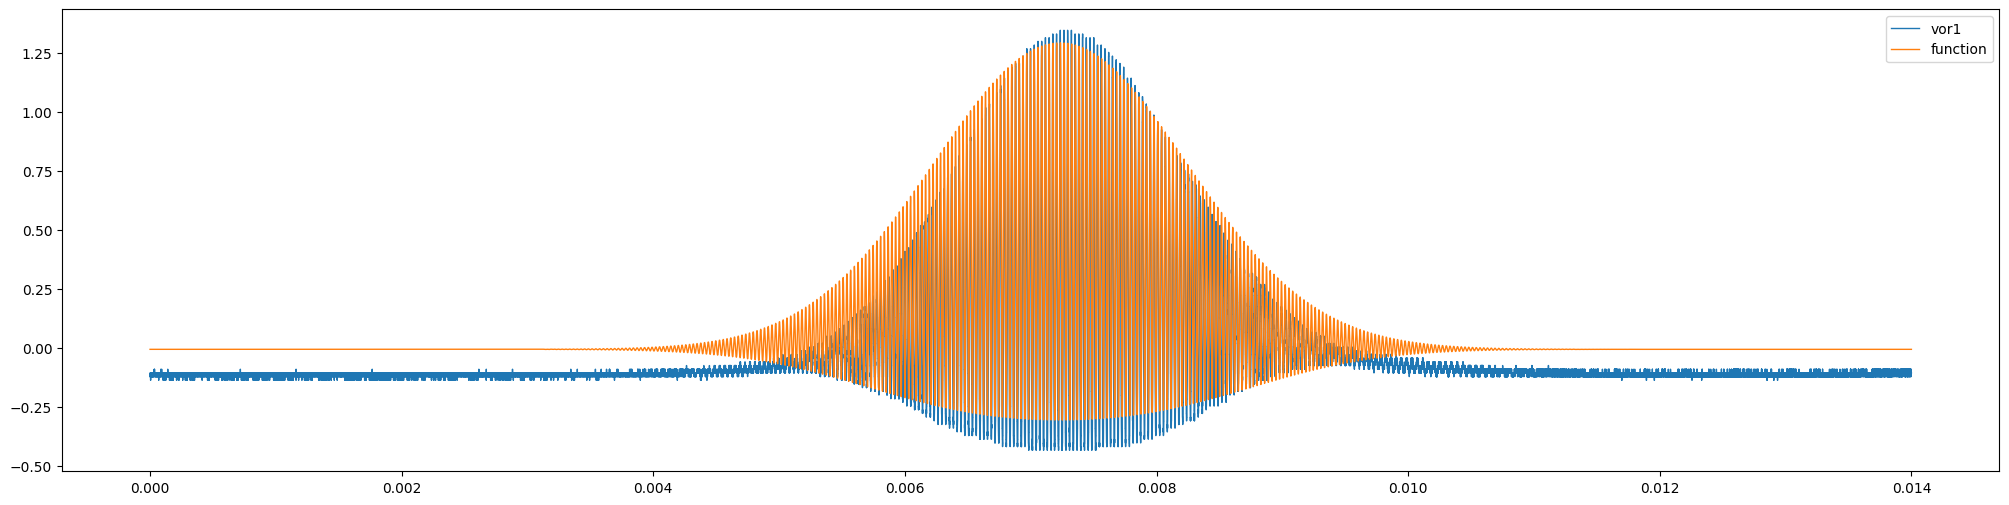

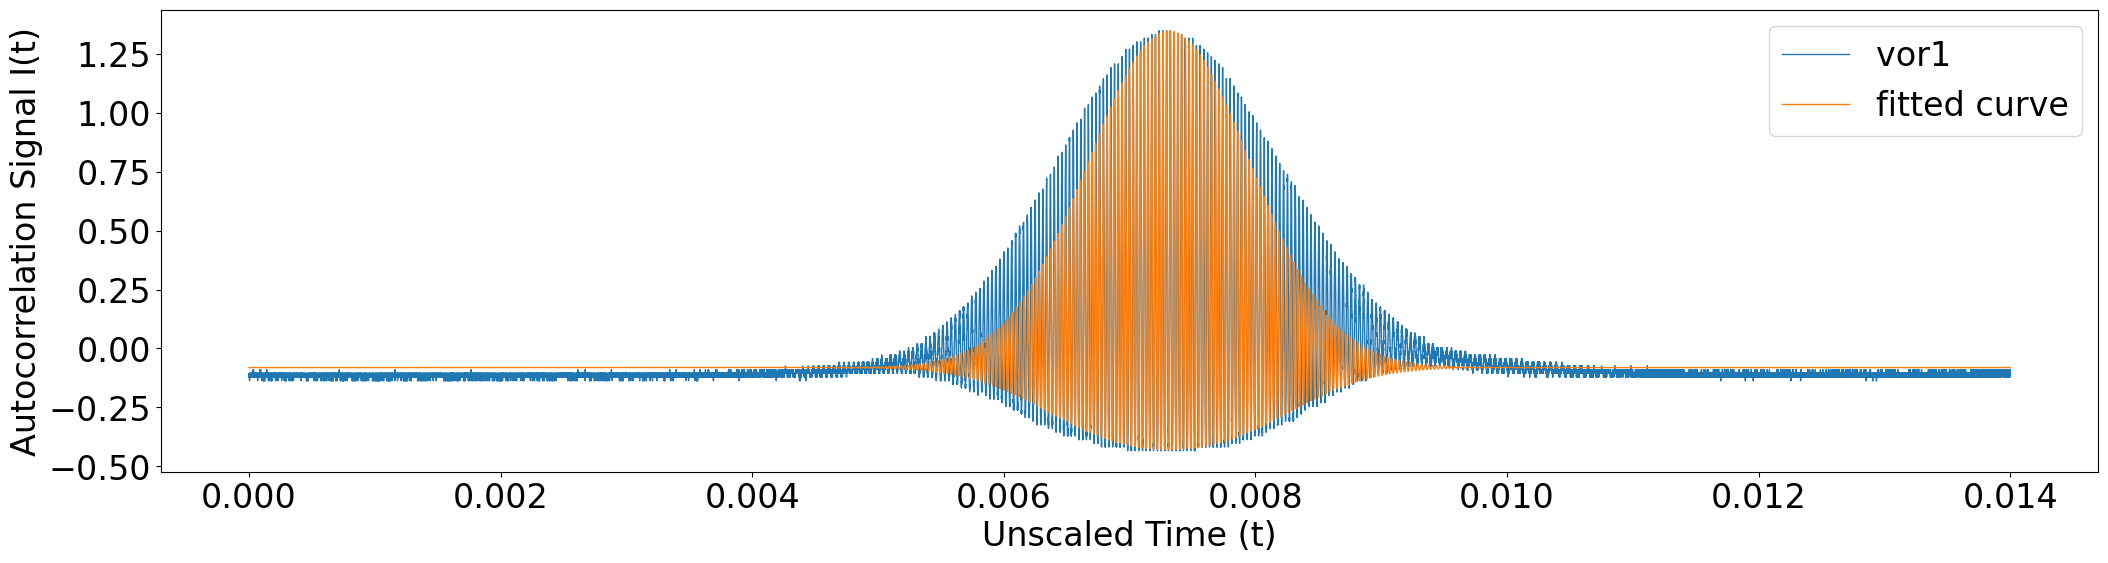

In [58]:
def function_2_1(t,t_0,Ω):
    A,B,C,w,O = [2.87611006e-01, 2.21994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00]
    I_1 = 1 + (A * np.exp((-2 * np.log(2) * ((t - t_0)**2)) / (w**2)))
    I_2 = B * 4 * np.exp(-3 * np.log(2) * ((t - t_0)**2) / (2 * w ** 2)) * np.cos(Ω * t)
    I_3 = C * 2 * np.exp(-2 * np.log(2) * ((t - t_0) **2) / (w**2)) * (np.cos(Ω * t))**2
    return I_1+I_2+I_3-O

t00,Ω0,w0,A0,B0,C0,O0 = unscalled_time_1[np.argmax(intensity_1)],211000,0.00154,0.5,.2,0,1-intensity_1[-1]-0.1

y_1 = initial_func(unscalled_time_1,A0,B0,C0,Ω0,w0,t00,O0)
plt.figure(figsize = (25,6))
plt.plot(unscalled_time_1,intensity_1,lw = 1, label = "vor1")
plt.plot(unscalled_time_1,y_1,lw = 1, label = "function")
plt.legend()
#plt.savefig(output_path+"raw_vor1.jpg")

#fitting 1st time with initial function
initial_guess_1 = [A0,B0,C0,Ω0,w0,t00,O0]
fitting_param_1, covariance_matrix_1 = curve_fit(initial_func, unscalled_time_1, intensity_1, p0 = initial_guess_1)
A,B,C,Ω,w,t,O = fitting_param_1
errors_1 = np.sqrt(np.diag(covariance_matrix_1))
fitting_output_1 = initial_func(unscalled_time_1,A,B,C,Ω,w,t,O)

'''
# output text file
# Combine the arrays into a single 2D array
combined_array_1 = np.column_stack((unscalled_time_1,intensity_1,fitting_output_1))
np.savetxt(output_path+"vor1.txt", combined_array_1, fmt='%.9f', delimiter='\t')
'''

# using new function with some fixed variables, free t_0 and Ω
w = 0.00139
z_1 = function_2_1(unscalled_time_1,t,2.11032718e+05)


#fitting 2nd time with new function
initial_guess_1_2 = [t,2.11032718e+05]
fitting_param_1_2, covariance_matrix_1_2 = curve_fit(function_2_1, unscalled_time_1, intensity_1, p0 = initial_guess_1_2)
t,Ω = fitting_param_1_2
fitting_output_1_2 = function_2_1(unscalled_time_1,t+.00005,Ω)
print(t+.00005,Ω)
print("error vor1",np.sqrt(np.diag(covariance_matrix_1_2)))


plt.figure(figsize = (25,6))
#plt.xlim(0.0067,0.0078)
plt.plot(unscalled_time_1,intensity_1,lw = 1, label = "vor1")
#plt.plot(unscalled_time_1,z_1,lw = 1, label = "directly using function_2")
#plt.plot(unscalled_time_1,fitting_output_1,lw = 1, label = "curve fitting using function_1")
plt.plot(unscalled_time_1,fitting_output_1_2,lw = 1, label = "fitted curve")
plt.xlabel("Unscaled Time (t)",fontsize=24)
plt.ylabel("Autocorrelation Signal I(t)",fontsize=24)
plt.xticks(fontsize=24)  # Set font size for x-axis ticks
plt.yticks(fontsize=24)  # Set font size for y-axis ticks
plt.legend(fontsize=24)  # Set font size for legend
plt.legend(fontsize=24)
plt.savefig(output_path+"fitted_vor1.jpg")



0.0017007
0.0017757 210711.47180278137


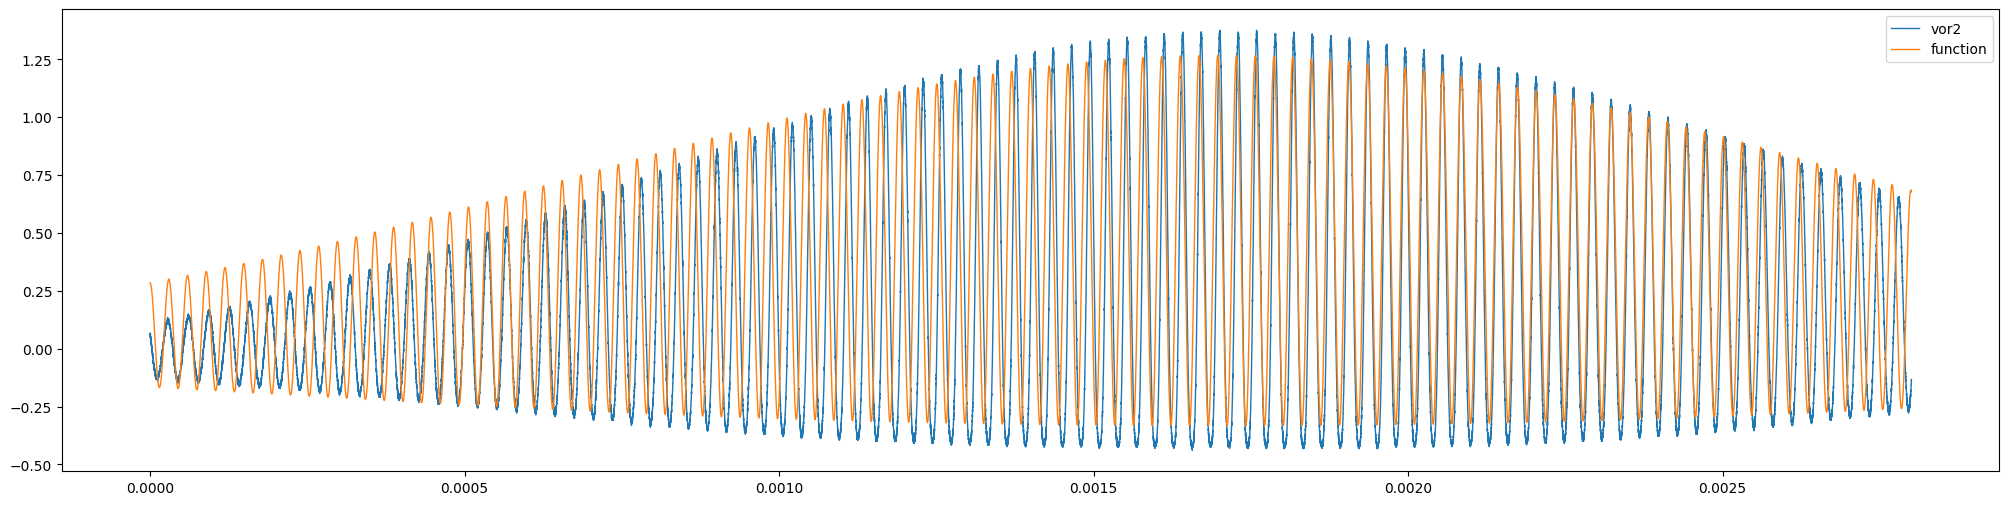

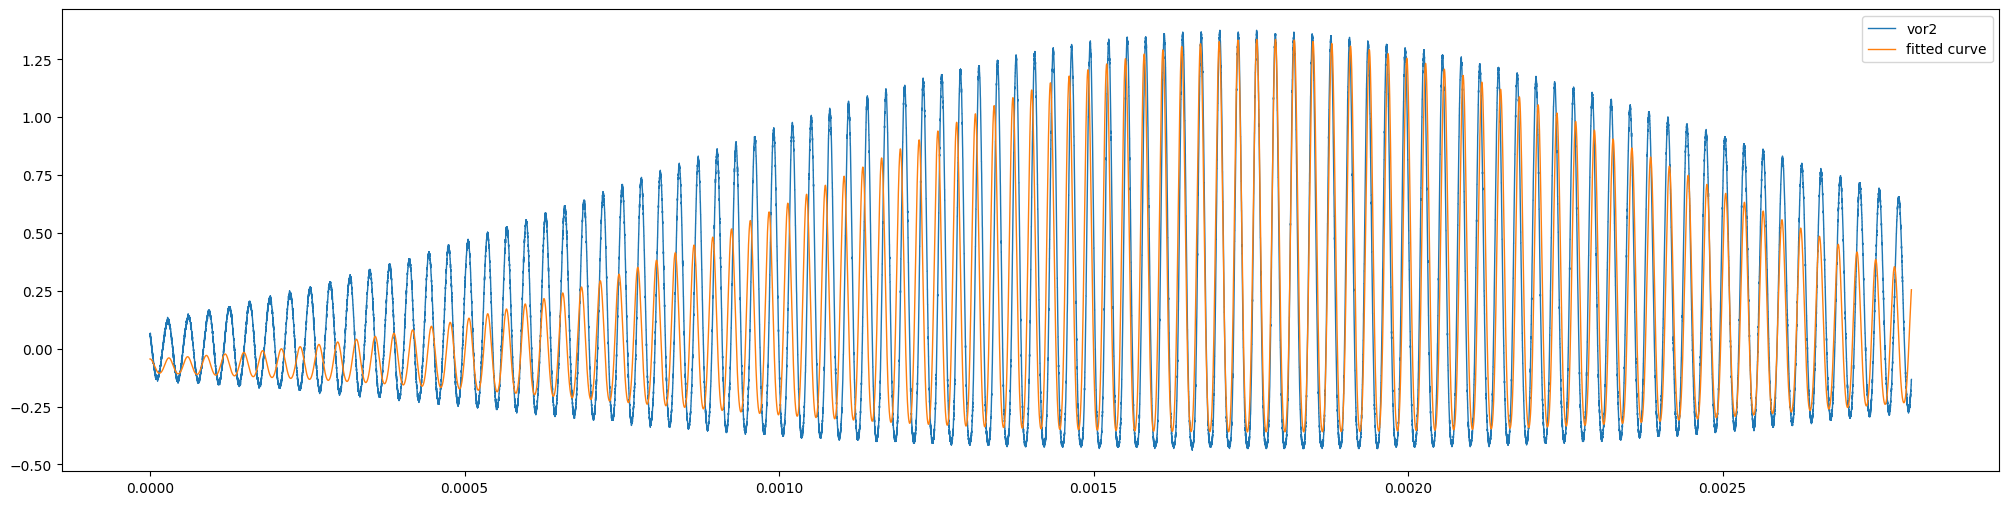

In [59]:
def function_2_2(t,t_0,Ω):

    A,B,C,w,O = [3.17611006e-01, 2.11994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00]
    I_1 = 1 + (A * np.exp((-2 * np.log(2) * ((t - t_0)**2)) / (w**2)))
    I_2 = B * 4 * np.exp(-3 * np.log(2) * ((t - t_0)**2) / (2 * w ** 2)) * np.cos(Ω * t)
    I_3 = C * 2 * np.exp(-2 * np.log(2) * ((t - t_0) **2) / (w**2)) * (np.cos(Ω * t))**2
    return I_1+I_2+I_3-O


t00,Ω0,w0,A0,B0,C0,O0 = unscalled_time_2[np.argmax(intensity_2)],211000,0.00154,0.5,.2,0,1-intensity_2[-1]-0.1
print(unscalled_time_2[np.argmax(intensity_2)])

initial_guess_2 = [A0,B0,C0,Ω0,w0,t00,O0]
y_2 = initial_func(unscalled_time_2,A0,B0,C0,Ω0,w0,t00,O0)
plt.figure(figsize = (25,6))
plt.plot(unscalled_time_2,intensity_2,lw = 1, label = "vor2")
plt.plot(unscalled_time_2,y_2,lw = 1, label = "function")
plt.legend()
#plt.savefig(output_path+"raw_vor2.jpg")

#fitting
fitting_param_2, covariance_matrix_2 = curve_fit(initial_func, unscalled_time_2, intensity_2, p0 = initial_guess_2)

# parameters
A,B,C,Ω,w,t,O = fitting_param_2
errors_2 = np.sqrt(np.diag(covariance_matrix_2))

fitting_output_2 = initial_func(unscalled_time_2,A,B,C,Ω,w,t,O)

z_2 = function_2_2(unscalled_time_2,unscalled_time_2[np.argmax(intensity_2)],Ω)

#fitting
initial_guess_2_2 = [t,Ω]
fitting_param_2_2, covariance_matrix_2_2 = curve_fit(function_2_2, unscalled_time_2, intensity_2, p0 = initial_guess_2_2)
t,Ω = fitting_param_2_2
fitting_output_2_2 = function_2_2(unscalled_time_2,unscalled_time_2[np.argmax(intensity_2)]+.000075,Ω)
print(unscalled_time_2[np.argmax(intensity_2)]+.000075,Ω)


plt.figure(figsize = (25,6))
plt.plot(unscalled_time_2,intensity_2,lw = 1, label = "vor2")
#plt.plot(unscalled_time_2,z_2,lw = 1, label = "fitted_2_2")
#plt.plot(unscalled_time_2,fitting_output_2,lw = 1, label = "fitted_2")
plt.plot(unscalled_time_2,fitting_output_2_2,lw = 1, label = "fitted curve")
plt.legend()
plt.savefig(output_path+"fitted_vor2.jpg")

0.007221
[ 4.28933477e-01 -1.47196943e-01  1.27870050e-02  2.11012752e+05
  1.19758158e-03  7.33206589e-03  1.08564410e+00]
0.007221
0.007296 210617.58293375678


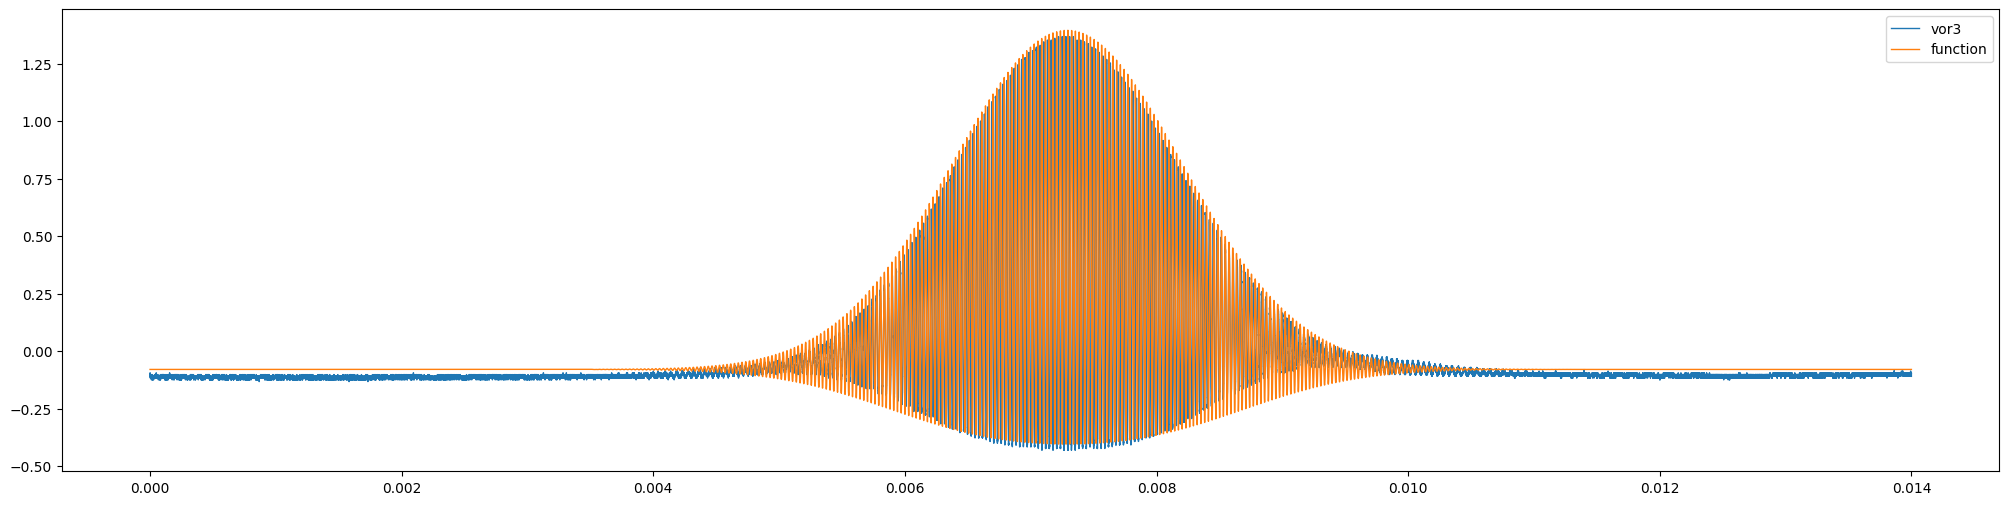

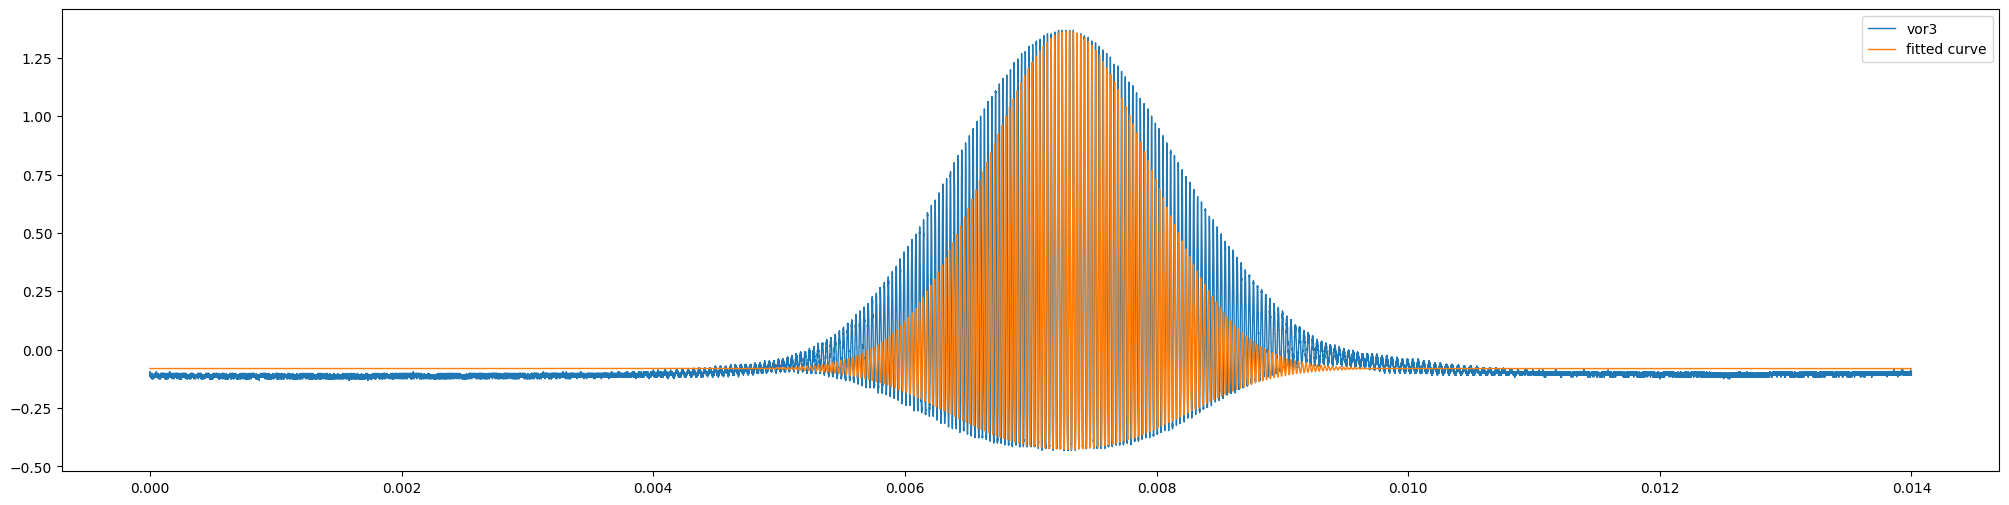

In [60]:
def function_2_3(t,t_0,Ω):

    A,B,C,w,O = [.297611006, 2.23994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00]
    I_1 = 1 + (A * np.exp((-2 * np.log(2) * ((t - t_0)**2)) / (w**2)))
    I_2 = B * 4 * np.exp(-3 * np.log(2) * ((t - t_0)**2) / (2 * w ** 2)) * np.cos(Ω * t)
    I_3 = C * 2 * np.exp(-2 * np.log(2) * ((t - t_0) **2) / (w**2)) * (np.cos(Ω * t))**2
    return I_1+I_2+I_3-O


t00,Ω0,w0,A0,B0,C0,O0 = 0.00729,211000,0.0014,.575,.225,0.00,1-intensity_3[-1]-0.03
print(unscalled_time_3[np.argmax(intensity_3)])

initial_guess_3 = [A0,B0,C0,Ω0,w0,t00,O0]
y_3 = initial_func(unscalled_time_3,A0,B0,C0,Ω0,w0,t00,O0)

plt.figure(figsize = (25,6))
plt.plot(unscalled_time_3,intensity_3,lw = 1, label = "vor3")
plt.plot(unscalled_time_3,y_3,lw = 1, label = "function")
plt.legend()
#plt.savefig(output_path+"raw_vor3.jpg")

#fitting
fitting_param_3, covariance_matrix_3 = curve_fit(initial_func, unscalled_time_3, intensity_3, p0 = initial_guess_3)

print(fitting_param_3)
#print(np.sqrt(np.diag(covariance_matrix)))

# parameters
A,B,C,Ω,w,t,O = fitting_param_3
errors_3 = np.sqrt(np.diag(covariance_matrix_3))

fitting_output_3 = initial_func(unscalled_time_3,A,B,C,Ω,w,t,O)

z_3 = function_2_3(unscalled_time_3,unscalled_time_3[np.argmax(intensity_3)]+.000075,Ω)
print(unscalled_time_3[np.argmax(intensity_3)])
#fitting
initial_guess_3_2 = [t,Ω]
fitting_param_3_2, covariance_matrix_3_2 = curve_fit(function_2_3, unscalled_time_3, intensity_3, p0 = initial_guess_3_2)
t,Ω = fitting_param_3_2
fitting_output_3_2 = function_2_3(unscalled_time_3,unscalled_time_3[np.argmax(intensity_3)]+.000075,Ω)
print(unscalled_time_3[np.argmax(intensity_3)]+.000075,Ω)


plt.figure(figsize = (25,6))
#plt.xlim(0.0057,0.0088)
plt.plot(unscalled_time_3,intensity_3,lw = 1, label = "vor3")
#plt.plot(unscalled_time_3,z_3,lw = 1, label = "vor3_3")
#plt.plot(unscalled_time_3,fitting_output_3,lw = 1, label = "fitted_3")
plt.plot(unscalled_time_3,fitting_output_3_2,lw = 1, label = "fitted curve")
plt.legend()
plt.savefig(output_path+"fitted_vor3.jpg")

#### finding the w (FWHM) using different method
The method is to plot a gaussina with the local maxima of each curve, then draw a gaussian, then fin the width (w) of that gaussian curve

error of vor1 [2.32273108e-03 2.99333572e-06 1.65862937e-06 7.73912122e-04]
[1.43331861 0.0015124  0.00731043 0.09322341]
error of vor2 [6.95282317e-03 6.68674642e-06 9.58775063e-07 7.40526341e-03]
[1.51029434 0.00152342 0.00173109 0.1398979 ]
error of vor3 [2.23910693e-03 2.82254774e-06 1.56404664e-06 7.42971806e-04]
[1.45612869 0.00150334 0.00729306 0.09350657]
vor1: w =  0.001512399634573382
vor2: w =  0.0015234199003020985
vor3: w =  0.001503340857604034


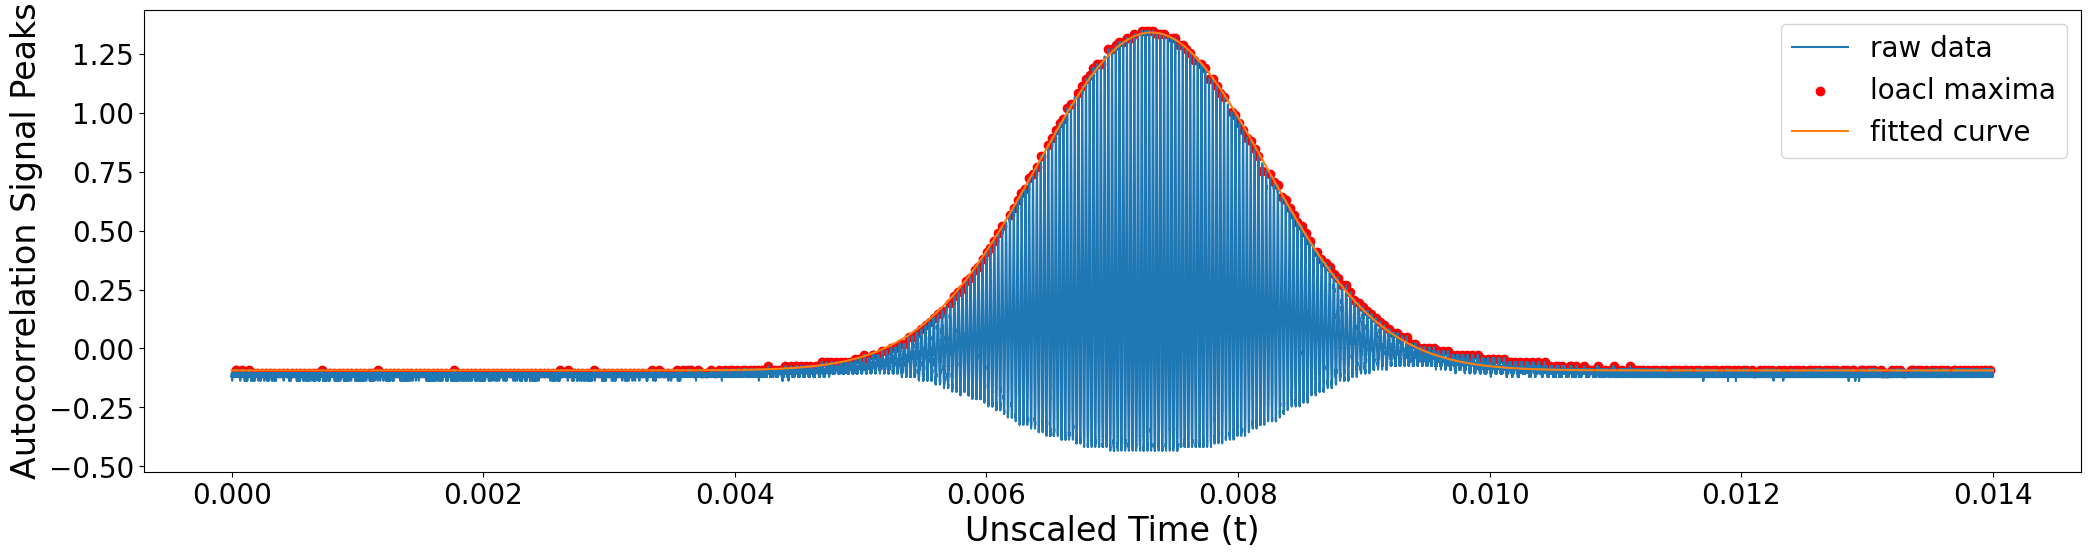

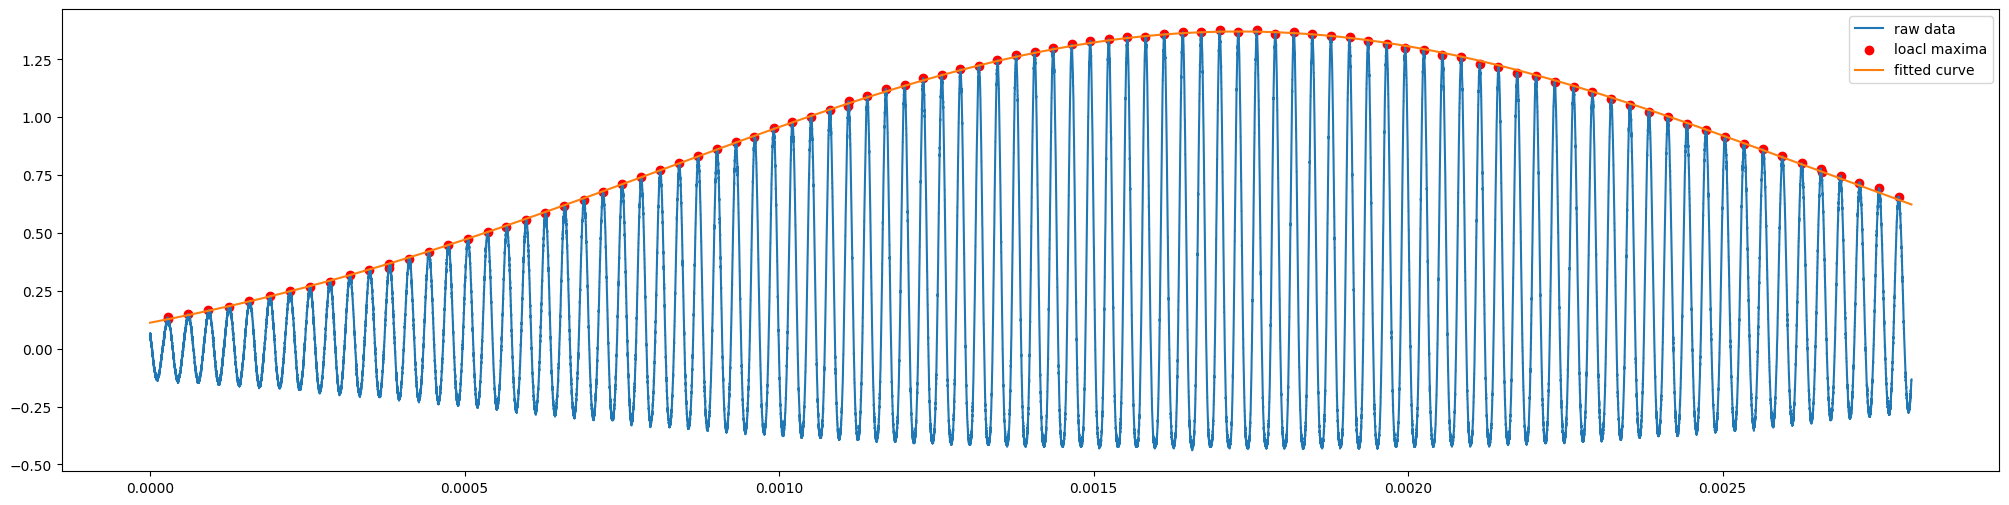

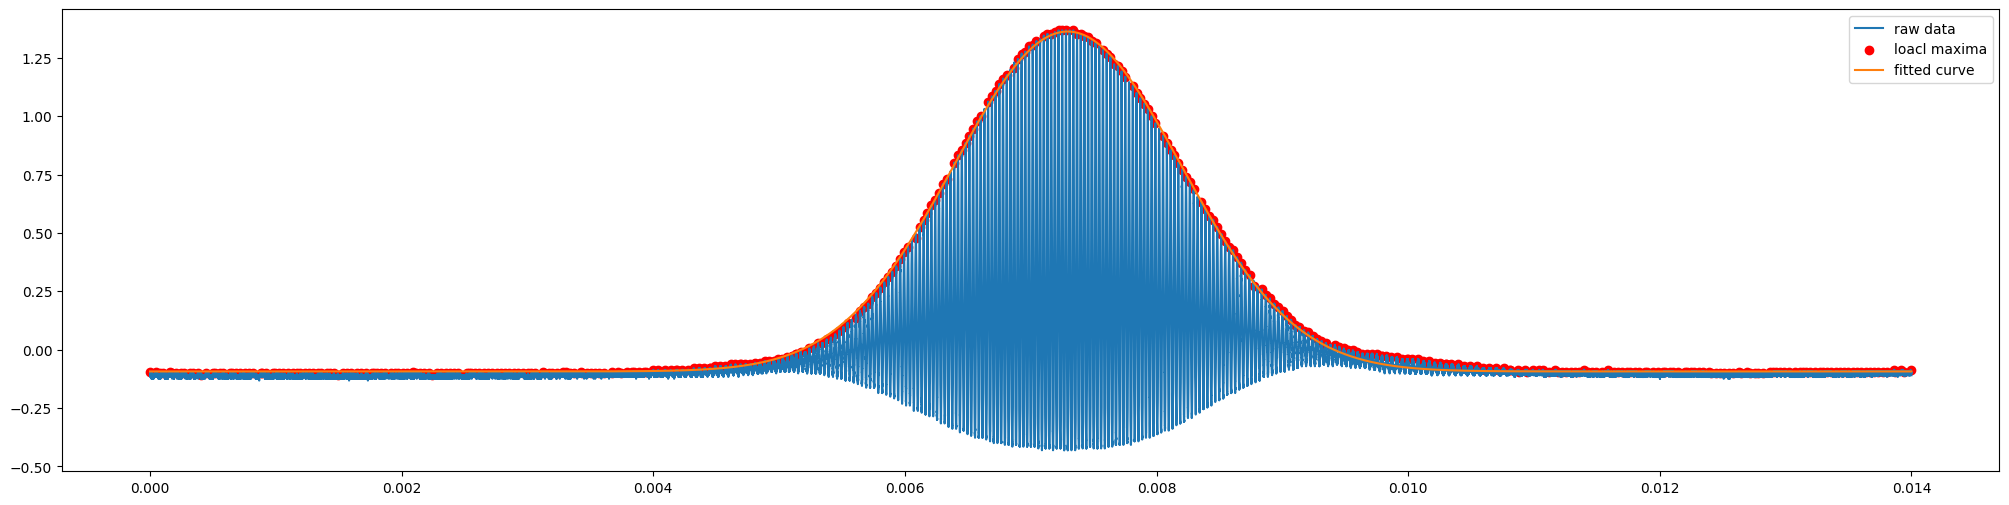

In [61]:
## finding the local maxima
# Method 2: Assumes periodicity of 170 points (identified manually)
def maxfn(x,I,n):

    maxim = []
    x_ = []
    #n = 0
    
    for i in range(0,len(x),n):
        m = I[i:i+n]
        k = np.argmax(m)
        p = i + k
        maxim.append(I[p])
        x_.append(x[p])
        #n += 1
    return x_,maxim
            
# function for gaussian curve
def gauss(t,A,w,t_0,O):
    return A*np.exp(-2*np.log(2)*((t-t_0)**2)/(w**2)) - O


### ------------------- vor1 --------------------
# get the coordinates of the local maxima using maxfn
gauss_x_vor1, gauss_y_vor1 = maxfn(unscalled_time_1,intensity_1,170)

# fit the local maxima curve
gauss_fitting_param_vor1, gauss_fitting_param_error_vor1 = curve_fit(gauss, gauss_x_vor1, gauss_y_vor1, p0 = [1.25, 0.00139, 0.00729, 0.2])
print("error of vor1",np.sqrt(np.diag(gauss_fitting_param_error_vor1)))
print(gauss_fitting_param_vor1)
gauss_fitted_out_vor1 = gauss(unscalled_time_1, gauss_fitting_param_vor1[0], gauss_fitting_param_vor1[1], gauss_fitting_param_vor1[2], gauss_fitting_param_vor1[3])
plt.figure(figsize = (25,6))
#plt.xlim(0.0047,0.0098)
plt.plot(unscalled_time_1,intensity_1, label = "raw data")
plt.scatter(gauss_x_vor1,gauss_y_vor1, c="red", label="loacl maxima")
plt.plot(unscalled_time_1,gauss_fitted_out_vor1, label="fitted curve")
plt.xlabel("Unscaled Time (t)",fontsize=24)
plt.ylabel("Autocorrelation Signal Peaks",fontsize=24)
plt.xticks(fontsize=20)  # Set font size for x-axis ticks
plt.yticks(fontsize=20)  # Set font size for y-axis ticks
plt.legend(fontsize=20)  # Set font size for legend
plt.legend(fontsize=20)
plt.savefig(output_path+"Gaussian_fitted_vor1.jpg")

### ------------------- vor2 --------------------
# get the coordinates of the local maxima using maxfn
gauss_x_vor2, gauss_y_vor2 = maxfn(unscalled_time_2,intensity_2,730)

# fit the local maxima curve
gauss_fitting_param_vor2, gauss_fitting_param_error_vor2 = curve_fit(gauss, gauss_x_vor2, gauss_y_vor2, p0 = [1.25, 0.00139, 0.0017, 0.2])
print("error of vor2",np.sqrt(np.diag(gauss_fitting_param_error_vor2)))
print(gauss_fitting_param_vor2)
gauss_fitted_out_vor2 = gauss(unscalled_time_2, gauss_fitting_param_vor2[0], gauss_fitting_param_vor2[1], gauss_fitting_param_vor2[2], gauss_fitting_param_vor2[3])
plt.figure(figsize = (25,6))
#plt.xlim(0.0047,0.0098)
plt.plot(unscalled_time_2,intensity_2, label = "raw data")
plt.scatter(gauss_x_vor2,gauss_y_vor2, c="red", label="loacl maxima")
plt.plot(unscalled_time_2,gauss_fitted_out_vor2, label="fitted curve")
plt.legend()
plt.savefig(output_path+"Gaussian_fitted_vor2.jpg")


### ------------------- vor3 --------------------
# get the coordinates of the local maxima using maxfn
gauss_x_vor3, gauss_y_vor3 = maxfn(unscalled_time_3,intensity_3,170)

# fit the local maxima curve
gauss_fitting_param_vor3, gauss_fitting_param_error_vor3 = curve_fit(gauss, gauss_x_vor3, gauss_y_vor3, p0 = [1.25, 0.00139, 0.00729, 0.2])
print("error of vor3",np.sqrt(np.diag(gauss_fitting_param_error_vor3)))
print(gauss_fitting_param_vor3)
gauss_fitted_out_vor3 = gauss(unscalled_time_3, gauss_fitting_param_vor3[0], gauss_fitting_param_vor3[1], gauss_fitting_param_vor3[2], gauss_fitting_param_vor3[3])
plt.figure(figsize = (25,6))
#plt.xlim(0.0047,0.0098)
plt.plot(unscalled_time_3,intensity_3, label = "raw data")
plt.scatter(gauss_x_vor3,gauss_y_vor3,c="red", label="loacl maxima")
plt.plot(unscalled_time_3,gauss_fitted_out_vor3, label="fitted curve")
plt.legend()
plt.savefig(output_path+"Gaussian_fitted_vor3.jpg")

print("vor1: w = ",gauss_fitting_param_vor1[1] )
print("vor2: w = ",gauss_fitting_param_vor2[1] )
print("vor3: w = ",gauss_fitting_param_vor3[1] )


### Parameters all togather

In [62]:
# ----------- parameters for table
#A,B,C,w,O = [2.87611006e-01, 2.21994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00]
fitting_parameters_1_for_table = np.array([2.87611006e-01, 2.21994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00,fitting_param_1_2[0],fitting_param_1_2[1]])
#A,B,C,w,O = [3.17611006e-01, 2.11994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00]
fitting_parameters_2_for_table = np.array([3.17611006e-01, 2.11994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00,fitting_param_2_2[0],fitting_param_2_2[1]])
#A,B,C,w,O = [.297611006, 2.23994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00]
fitting_parameters_3_for_table = np.array([.297611006, 2.23994251e-01, 1.26049115e-01, 9.90945097e-04,1.08110740e+00,fitting_param_3_2[0],fitting_param_3_2[1]])


In [63]:
all_parameters = np.array(["A", "B", "C", "w", "O", "t", "Ω"])


# Combine arrays into a list of lists
data = list(zip(all_parameters,fitting_parameters_1_for_table,fitting_parameters_2_for_table,fitting_parameters_3_for_table))

# Create headers for the table
headers = ["Parameters","vor 1", "vor 2", "vor 3",]

# Generate LaTeX table code
latex_table = tabulate(data, headers, tablefmt="latex_raw")

# Print or save the LaTeX table code
print(latex_table)

print("end")

\begin{tabular}{lrrr}
\hline
 Parameters   &            vor 1 &            vor 2 &            vor 3 \\
\hline
 A            &      0.287611    &      0.317611    &      0.297611    \\
 B            &      0.221994    &      0.211994    &      0.223994    \\
 C            &      0.126049    &      0.126049    &      0.126049    \\
 w            &      0.000990945 &      0.000990945 &      0.000990945 \\
 O            &      1.08111     &      1.08111     &      1.08111     \\
 t            &      0.00726289  &      0.00193114  &      0.00751699  \\
 Ω            & 211033           & 210711           & 210618           \\
\hline
\end{tabular}
end
